In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv("../Data/pollution_data.csv")

In [45]:
# Check for null values and replace with means for each year
 
print(df.isnull().sum())
null_counts = df.isnull().sum()
for column in df.columns:
    if null_counts[column] > 0:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
df.isnull().sum()

Year      0
State     0
CO       17
NO2      47
SO2       3
O3        0
PM2.5    12
dtype: int64


Year     0
State    0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
dtype: int64

In [46]:
df.isnull().sum()

Year     0
State    0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
dtype: int64

In [47]:
df["Year"].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

Exploratory Data Analysis


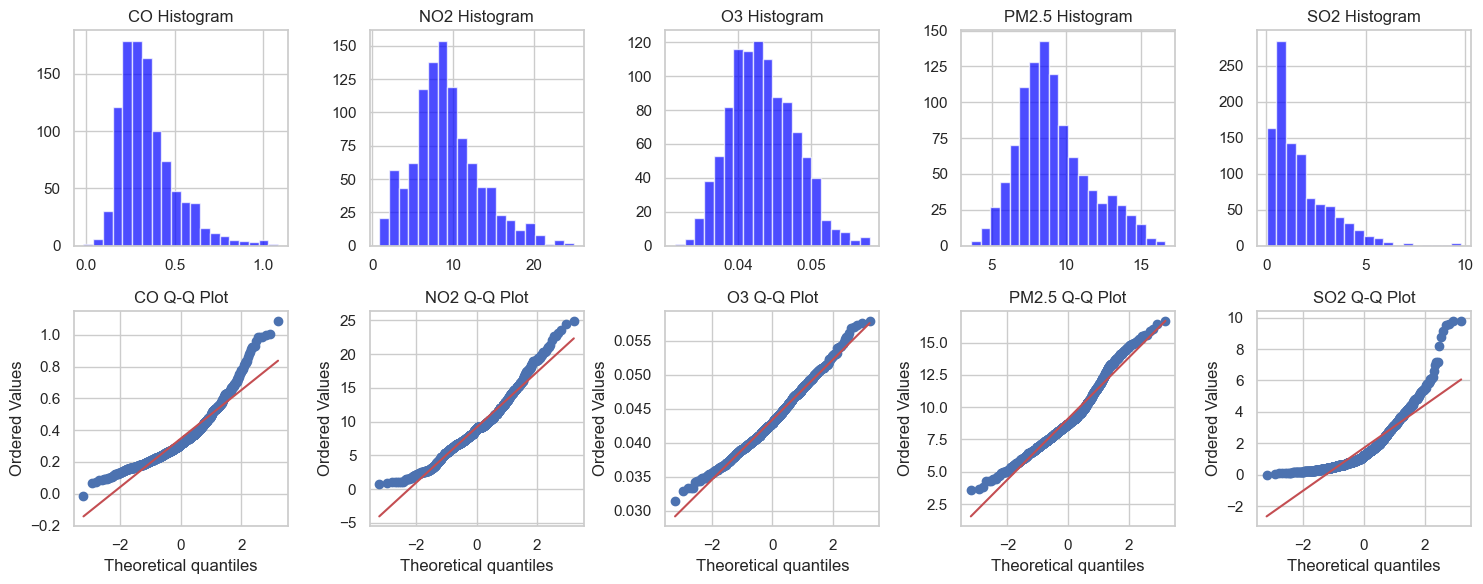

CO is not normally distributed (p-value: 3.963504890932899e-52)
NO2 is not normally distributed (p-value: 2.4774471957746442e-17)
O3 is not normally distributed (p-value: 4.091285573938172e-05)
PM2.5 is not normally distributed (p-value: 1.151426946684297e-13)
SO2 is not normally distributed (p-value: 8.240553672064648e-84)


In [48]:
# Univarite Analysis
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract the data for each variable
co = df["CO"]
no2 = df["NO2"]
o3 = df["O3"]
pm25 = df["PM2.5"]
so2 = df["SO2"]

# Create a list of variable names for plotting and analysis
variables = [co, no2, o3, pm25, so2]
var_names = ["CO", "NO2", "O3", "PM2.5", "SO2"]

# Set up subplots for the histograms and Q-Q plots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Loop through each variable for analysis
for i in range(len(variables)):
    # Histogram
    axes[0, i].hist(variables[i], bins=20, color="blue", alpha=0.7)
    axes[0, i].set_title(f"{var_names[i]} Histogram")

    # Q-Q Plot
    stats.probplot(variables[i], dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f"{var_names[i]} Q-Q Plot")

plt.tight_layout()
plt.show()

# Perform normality tests
for i in range(len(variables)):
    variable_name = var_names[i]
    p_value = stats.normaltest(variables[i]).pvalue
    if p_value < 0.05:
        print(f"{variable_name} is not normally distributed (p-value: {p_value})")
    else:
        print(f"{variable_name} is normally distributed (p-value: {p_value})")

In [49]:
df.isnull().sum()

Year     0
State    0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
dtype: int64

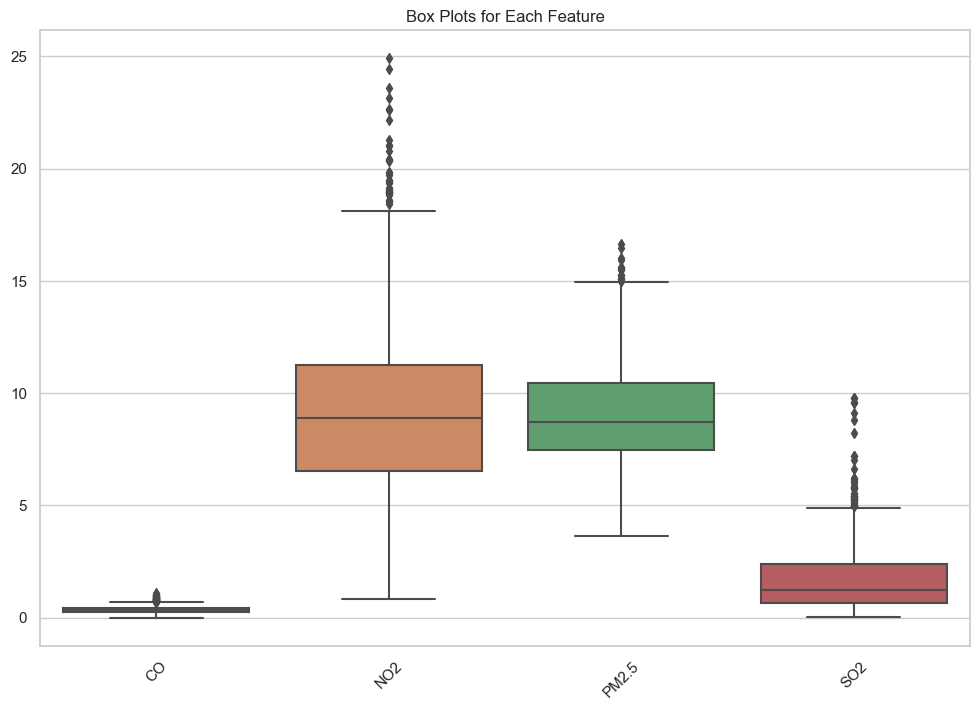

In [50]:
# Set the style of the plot (optional)
sn.set(style="whitegrid")

# Create a box plot for each relevant column
plt.figure(figsize=(12, 8))  # Set the figure size
sn.boxplot(data=df[["CO", "NO2", "PM2.5", "SO2"]])
plt.title("Box Plots for Each Feature")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

In [51]:
df.isnull().sum()

Year     0
State    0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
dtype: int64

In [52]:
import numpy as np

df["CO"] = np.log(df["CO"])
df["NO2"] = np.log(df["NO2"])
df["PM2.5"] = np.log(df["PM2.5"])
df["SO2"] = np.log(df["SO2"])
df["O3"] = np.log(df["O3"])

In [53]:
df.isnull().sum()

Year     0
State    0
CO       1
NO2      0
SO2      0
O3       0
PM2.5    0
dtype: int64

In [54]:
# Check for null values and replace with means for each year
 
print(df.isnull().sum())
null_counts = df.isnull().sum()
for column in df.columns:
    if null_counts[column] > 0:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
df.isnull().sum()

Year     0
State    0
CO       1
NO2      0
SO2      0
O3       0
PM2.5    0
dtype: int64


Year     0
State    0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
dtype: int64

In [55]:
df.isnull().sum()

Year     0
State    0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
dtype: int64

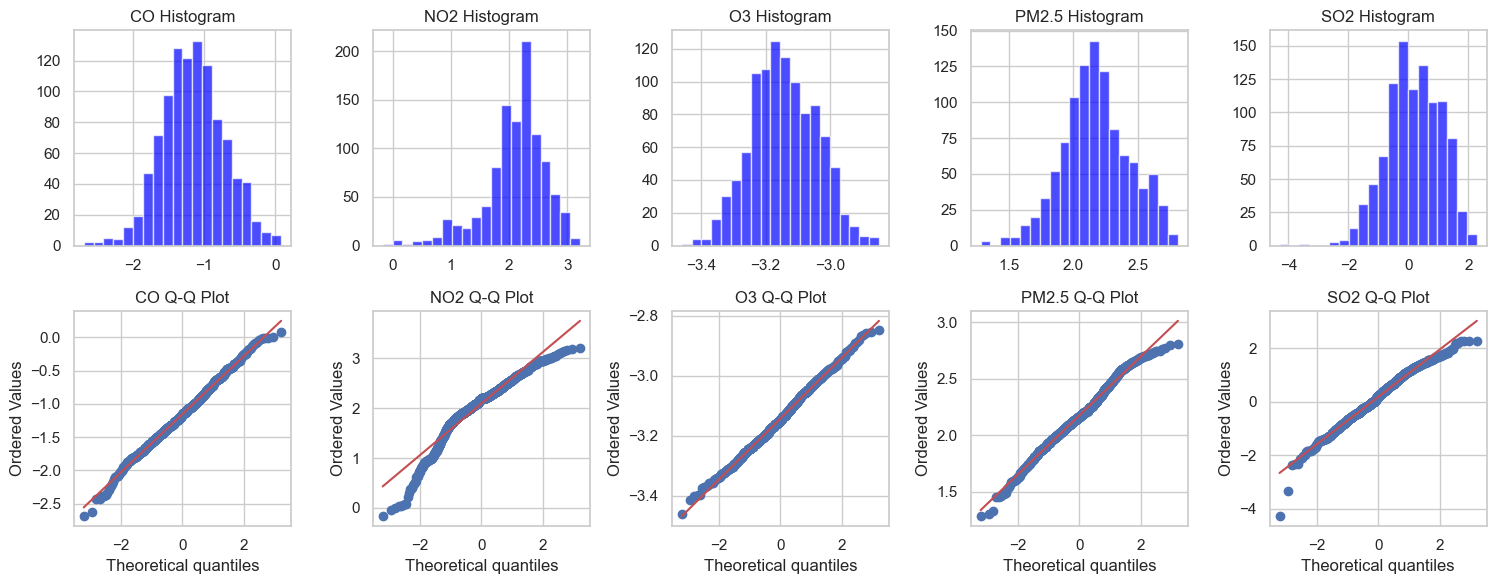

CO is normally distributed (p-value: 0.7775125751879363)
NO2 is not normally distributed (p-value: 1.0778805222832508e-40)
O3 is normally distributed (p-value: 0.053660966897871754)
PM2.5 is normally distributed (p-value: 0.7183961535544425)
SO2 is not normally distributed (p-value: 0.00019214177606737006)


In [56]:
# Univarite Analysis
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract the data for each variable
co = df["CO"]
no2 = df["NO2"]
o3 = df["O3"]
pm25 = df["PM2.5"]
so2 = df["SO2"]

# Create a list of variable names for plotting and analysis
variables = [co, no2, o3, pm25, so2]
var_names = ["CO", "NO2", "O3", "PM2.5", "SO2"]

# Set up subplots for the histograms and Q-Q plots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Loop through each variable for analysis
for i in range(len(variables)):
    # Histogram
    axes[0, i].hist(variables[i], bins=20, color="blue", alpha=0.7)
    axes[0, i].set_title(f"{var_names[i]} Histogram")

    # Q-Q Plot
    stats.probplot(variables[i], dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f"{var_names[i]} Q-Q Plot")

plt.tight_layout()
plt.show()

# Perform normality tests
for i in range(len(variables)):
    variable_name = var_names[i]
    p_value = stats.normaltest(variables[i]).pvalue
    if p_value < 0.05:
        print(f"{variable_name} is not normally distributed (p-value: {p_value})")
    else:
        print(f"{variable_name} is normally distributed (p-value: {p_value})")

In [57]:
df.head()

,Year,State,CO,NO2,SO2,O3,PM2.5
0,2002,Alabama,-0.398217,1.769090,0.855967,-3.103847,2.645233
1,2002,Arizona,-0.115297,2.965385,1.313992,-2.985399,2.276935
2,2002,Arkansas,-0.518243,2.751239,0.970798,-3.133295,2.468995
3,2002,California,-0.511469,2.793577,0.474148,-3.109956,2.666997
4,2002,Colorado,-0.347411,2.813310,1.137541,-2.991553,2.102621


In [58]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the independent variables (features)
independent_vars = ["CO", "NO2", "O3", "SO2"]

# Calculate VIF for each variable
X = df[independent_vars]
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_vars
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

  Variable        VIF
0       CO  13.578684
1      NO2  21.412460
2       O3  46.310688
3      SO2   1.419573


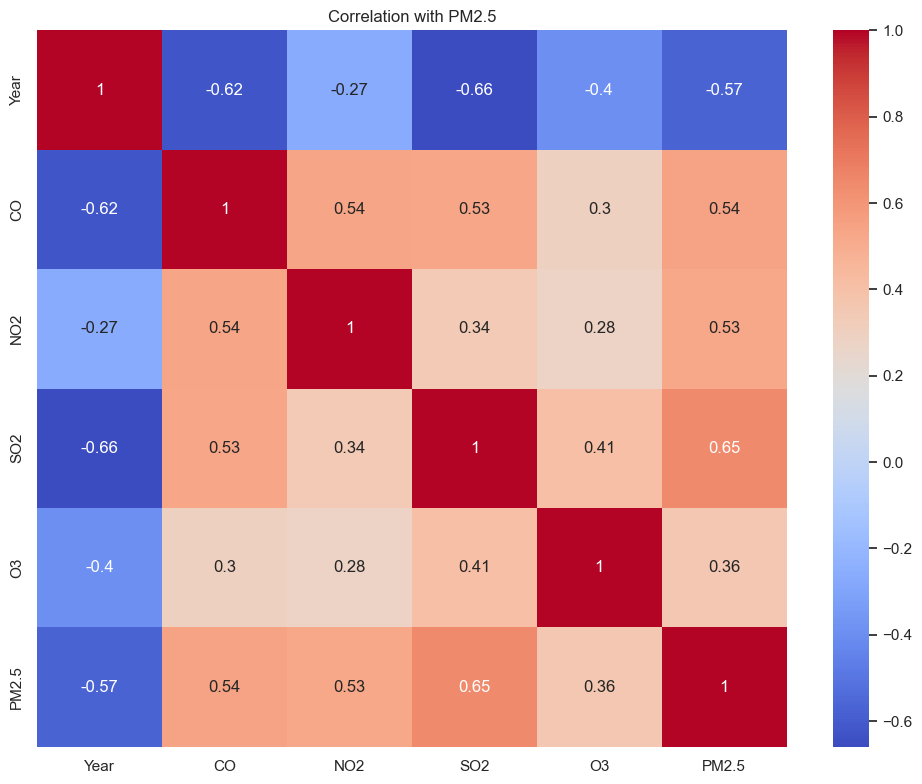

In [59]:
# Drop the 'State' column
corr_df = df.drop(columns=["State"])

# Calculate the correlation matrix for 'PM2.5' with all features
correlation_pm25 = corr_df.corrwith(df["PM2.5"])

# Create a correlation matrix for all features
correlation_matrix = corr_df.corr()

# Plot the correlation matrix with 'PM2.5' using a heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation with PM2.5")

plt.tight_layout()
plt.show()

Explained Variance for PC1: 0.5520
Explained Variance for PC2: 0.1989
Explained Variance for PC3: 0.1520
Explained Variance for PC4: 0.0971


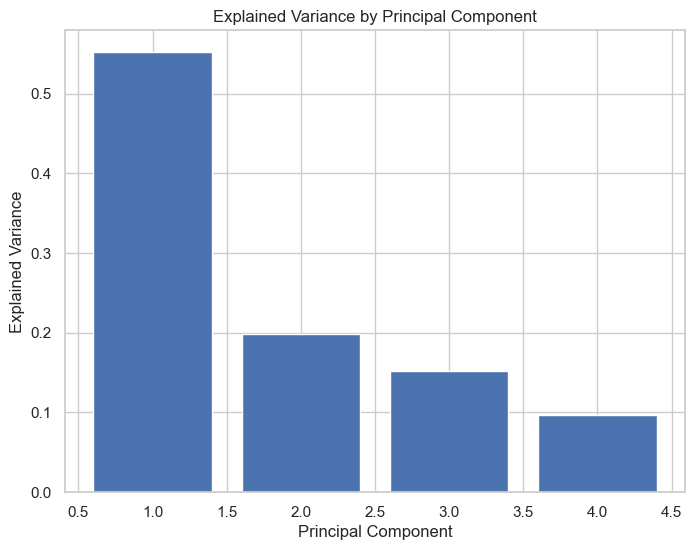

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the columns with numeric data for PCA
numeric_columns_scale = ["CO", "NO2", "O3", "SO2"]

# Standardize the data (mean=0, std=1) for PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numeric_columns_scale])
# Apply PCA
pca = PCA()

pca_result = pca.fit_transform(data_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print explained variance
for i, var in enumerate(explained_variance):
    print(f"Explained Variance for PC{i+1}: {var:.4f}")

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.title("Explained Variance by Principal Component")
plt.show()

In [61]:
print(pca_result)

[[-1.21756137 -0.17691725  1.05177166  1.20904769]
 [-3.43953454  0.18053141 -0.24394706  0.64661376]
 [-1.91352147  0.85525361  0.18246425  0.08951038]
 ...
 [ 0.7987811   0.3463568   0.09440823 -1.13328292]
 [ 1.41758434  0.03094061 -0.38017604 -0.43821284]
 [ 3.12200294 -2.49296132 -0.55432239 -0.32703691]]


In [110]:
# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_scaled)

# Create a DataFrame with the first 3 principal components
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2", "PC3"])

# Add the 'Year' and 'State' columns back if needed
pca_df["Year"] = df["Year"]
pca_df["State"] = df["State"]
pca_df["PM2.5"] = df["PM2.5"]

# Print the DataFrame with the first 3 principal components
print(pca_df)

           PC1       PC2       PC3  Year          State     PM2.5
0    -1.217561 -0.176917  1.051772  2002        Alabama  2.645233
1    -3.439535  0.180531 -0.243947  2002        Arizona  2.276935
2    -1.913521  0.855254  0.182464  2002       Arkansas  2.468995
3    -1.766914  0.845454 -0.329383  2002     California  2.666997
4    -2.877374 -0.055896 -0.306935  2002       Colorado  2.102621
...        ...       ...       ...   ...            ...       ...
1024  1.077426  0.290392 -0.016860  2022       Virginia  1.903379
1025  1.628586  1.795871 -1.120296  2022     Washington  2.130241
1026  0.798781  0.346357  0.094408  2022  West Virginia  2.020538
1027  1.417584  0.030941 -0.380176  2022      Wisconsin  1.957178
1028  3.122003 -2.492961 -0.554322  2022        Wyoming  1.334425

[1029 rows x 6 columns]


In [116]:
from sklearn.model_selection import train_test_split

# Assuming you have a feature matrix 'X' and a target vector 'y'
# Replace 'X' and 'y' with your actual data
X = pca_df.drop(columns=["PM2.5"])
y = pca_df["PM2.5"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameters:
# X: Feature matrix (input data)
# y: Target vector (output labels)
# test_size: The proportion of the dataset to include in the test split (e.g., 0.2 for 20% test data)
# random_state: Seed for random number generation for reproducibility

# 'X_train' and 'y_train' are your training data, and 'X_test' and 'y_test' are your testing data.


In [117]:
df.shape

(1029, 7)

In [106]:
# Filter train and test data based on the specified years
# train_data = train_data[train_data['Year'] <= 2012]
# test_data = test_data[(test_data['Year'] >= 2013) & (test_data['Year'] <= 2015)]

# Separate the independent variables (X) and the target variable (y)
# X_train = train_data.drop(columns=["PM2.5", "Year"])
# y_train = train_data["PM2.5"]

# X_test = test_data.drop(columns=["PM2.5", "Year"])
# y_test = test_data["PM2.5"]

In [118]:
X_train.shape

(823, 5)

In [119]:
X_test.shape

(206, 5)

In [120]:
X_train = pd.get_dummies(X_train, columns=["State"], prefix="State")
X_test = pd.get_dummies(X_test, columns=["State"], prefix="State")

In [121]:
X_train

,PC1,PC2,PC3,Year,State_Alabama,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
404,-1.949958,0.060826,0.199541,2010,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
988,1.147931,0.978120,0.593054,2022,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
522,1.868090,-1.428733,0.450040,2012,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
482,0.663250,-0.491145,-0.458985,2011,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
445,-1.129631,-1.793203,-0.813164,2011,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-0.589624,-0.334380,0.526678,2003,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
330,-0.932428,-0.694553,0.277339,2008,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466,0.090000,0.908665,0.631005,2011,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
121,-1.359696,0.380900,0.477387,2004,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
X_test

,PC1,PC2,PC3,Year,State_Alabama,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
686,-0.321568,0.455080,-0.384127,2016,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
687,-1.563218,-0.135282,-0.347907,2016,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
688,0.488943,0.387703,0.181196,2016,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
689,0.218013,0.285083,-0.734226,2016,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
690,-1.232303,-0.704946,-0.890083,2016,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,1.077426,0.290392,-0.016860,2022,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1025,1.628586,1.795871,-1.120296,2022,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1026,0.798781,0.346357,0.094408,2022,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1027,1.417584,0.030941,-0.380176,2022,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


## Model Building


In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

print("model score on training data:",lr.score(X_train, y_train))
print("model score on test data:",lr.score(X_test, y_test))

r2score= 0.7526190622628387
Mean absolute error =  0.08681956982734847
Mean Squared error =  0.015259436436854507
Root Mean Sqaured Error=  0.1235290914596821
model score on training data: 0.8546706775233275
model score on test data: 0.7526190622628387


In [129]:
cv_score = cross_val_score(lr, X_train, y_train, cv=5)
cv_mean = cv_score.mean()
cv_mean

0.830837906703989

In [130]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

r2score= 0.5809688406090902
Mean absolute error =  0.1169231295855064
Mean Squared error =  0.02584750223794835
Root Mean Sqaured Error=  0.16077158405000663


In [131]:
cv_score = cross_val_score(dtr, X_train, y_train, cv=5)
cv_mean = cv_score.mean()
cv_mean

0.6252099396038183

In [132]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state=12)
rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

r2score= 0.7295793982436869
Mean absolute error =  0.09571318317773593
Mean Squared error =  0.016680614203592018
Root Mean Sqaured Error=  0.12915345215514767


In [133]:
cv_score = cross_val_score(rfr, X_train, y_train, cv=5)
cv_mean = cv_score.mean()
cv_mean

0.7746570771380276

In [134]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, random_state=0)
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

r2score= 0.4434129586312392
Mean absolute error =  0.15251318004252395
Mean Squared error =  0.034332494075867005
Root Mean Sqaured Error=  0.18529029676663322


In [135]:
cv_score = cross_val_score(lasso, X_train, y_train, cv=5)
cv_mean = cv_score.mean()
cv_mean

0.4278855868931011

In [136]:
 from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train, y_train)
pred = rfr.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

r2score= 0.7295793982436869
Mean absolute error =  0.09571318317773593
Mean Squared error =  0.016680614203592018
Root Mean Sqaured Error=  0.12915345215514767


In [137]:
cv_score = cross_val_score(knr, X_train, y_train, cv=5)
cv_mean = cv_score.mean()
cv_mean

0.6917650286309682

In [147]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.001, random_state=0)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

print("model score on training data:",ridge.score(X_train, y_train))
print("model score on test data:",ridge.score(X_test, y_test))

r2score= 0.7526251760595397
Mean absolute error =  0.08681833541410945
Mean Squared error =  0.015259059313649296
Root Mean Sqaured Error=  0.12352756499522402
model score on training data: 0.8546706754315435
model score on test data: 0.7526251760595397


In [149]:
cv_score = cross_val_score(ridge, X_train, y_train, cv=5)

print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_score.mean(), cv_score.std()))

0.83 accuracy with a standard deviation of 0.02


Cosidering the difference between R2 score and cv mean score we get minimum difference with the Linear Regression model.
So we will consider that as the best model.


<b>Hyper parameter Tuning<b>


In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
parameter = {
    "fit_intercept": [True, False],
    "n_jobs": [42, -1, -10, 1, 10, 100, 200, 500, 35, 25],
}

In [142]:
GCV = GridSearchCV(LinearRegression(), parameter, cv=5)

In [143]:
GCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'n_jobs': [42, -1, -10, 1, 10, 100, 200, 500, 35, 25]})

In [ ]:
GCV.best_params_

{'fit_intercept': False, 'n_jobs': 42}

In [144]:
Final_mod = LinearRegression(fit_intercept=False, n_jobs=42)
Final_mod.fit(X_train, y_train)
pred = Final_mod.predict(X_test)
r2 = r2_score(y_test, pred)
cv_score = cross_val_score(Final_mod, X_train, y_train, cv=5)
cv_mean = cv_score.mean()
print(r2, cv_mean)

0.7526190622612824 0.8308473122752551


## Serialization


In [145]:
# Saving the model
import joblib

joblib.dump(Final_mod, "PM2.5predictor.pkl")

['PM2.5predictor.pkl']